In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv("pedestrian-counting-system-monthly-counts-per-hour.csv")

# Show basic info about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2275565 entries, 0 to 2275564
Data columns (total 9 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   ID                   int64 
 1   Location_ID          int64 
 2   Sensing_Date         object
 3   HourDay              int64 
 4   Direction_1          int64 
 5   Direction_2          int64 
 6   Total_of_Directions  int64 
 7   Sensor_Name          object
 8   Location             object
dtypes: int64(6), object(3)
memory usage: 156.3+ MB


(None,
               ID  Location_ID Sensing_Date  HourDay  Direction_1  Direction_2  \
 0    24420220222           24   2022-02-22        4           18           13   
 1    14320220313           14   2022-03-13        3           90            7   
 2  1421520240523          142   2024-05-23       15          277          255   
 3     5020230722            5   2023-07-22        0          155          224   
 4    70420240512           70   2024-05-12        4            1            1   
 
    Total_of_Directions   Sensor_Name                    Location  
 0                   31      Col620_T  -37.81887963, 144.95449198  
 1                   97      SanBri_T  -37.82011242, 144.96291897  
 2                  532  Hammer1584_T  -37.81970749, 144.96795734  
 3                  379       PriNW_T  -37.81874249, 144.96787656  
 4                    2     Errol20_T  -37.80456984, 144.94946228  )

In [21]:
# Step 1: Convert Sensing_Date to datetime format
df['Sensing_Date'] = pd.to_datetime(df['Sensing_Date'], errors='coerce')

# Step 2: Extract date features
df['Year'] = df['Sensing_Date'].dt.year
df['Month'] = df['Sensing_Date'].dt.month
df['Day'] = df['Sensing_Date'].dt.day
df['Weekday'] = df['Sensing_Date'].dt.day_name()

# Step 3: Split Location into Latitude and Longitude
df[['Latitude', 'Longitude']] = df['Location'].str.split(',', expand=True).astype(float)

# Optional: Display the first few rows to verify
print(df.head())
df.shape

              ID  Location_ID Sensing_Date  HourDay  Direction_1  Direction_2  \
0    24420220222           24   2022-02-22        4           18           13   
1    14320220313           14   2022-03-13        3           90            7   
2  1421520240523          142   2024-05-23       15          277          255   
3     5020230722            5   2023-07-22        0          155          224   
4    70420240512           70   2024-05-12        4            1            1   

   Total_of_Directions   Sensor_Name                    Location  Year  Month  \
0                   31      Col620_T  -37.81887963, 144.95449198  2022      2   
1                   97      SanBri_T  -37.82011242, 144.96291897  2022      3   
2                  532  Hammer1584_T  -37.81970749, 144.96795734  2024      5   
3                  379       PriNW_T  -37.81874249, 144.96787656  2023      7   
4                    2     Errol20_T  -37.80456984, 144.94946228  2024      5   

   Day   Weekday   Latitud

(2275565, 15)

In [17]:
# 1. Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# 2. Drop rows where critical fields are missing
df_cleaned = df.dropna(subset=['Sensing_Date', 'Latitude', 'Longitude'])

# 3. Remove duplicate rows if any
df_cleaned = df_cleaned.drop_duplicates()

# 4. Ensure pedestrian counts are non-negative
count_columns = ['Direction_1', 'Direction_2', 'Total_of_Directions']
for col in count_columns:
    df_cleaned = df_cleaned[df_cleaned[col] >= 0]

# Final shape of cleaned data
print("Cleaned dataset shape:", df_cleaned.shape)


Missing values per column:
ID                     0
Location_ID            0
Sensing_Date           0
HourDay                0
Direction_1            0
Direction_2            0
Total_of_Directions    0
Sensor_Name            0
Location               0
Year                   0
Month                  0
Day                    0
Weekday                0
Latitude               0
Longitude              0
dtype: int64
Cleaned dataset shape: (2275565, 15)


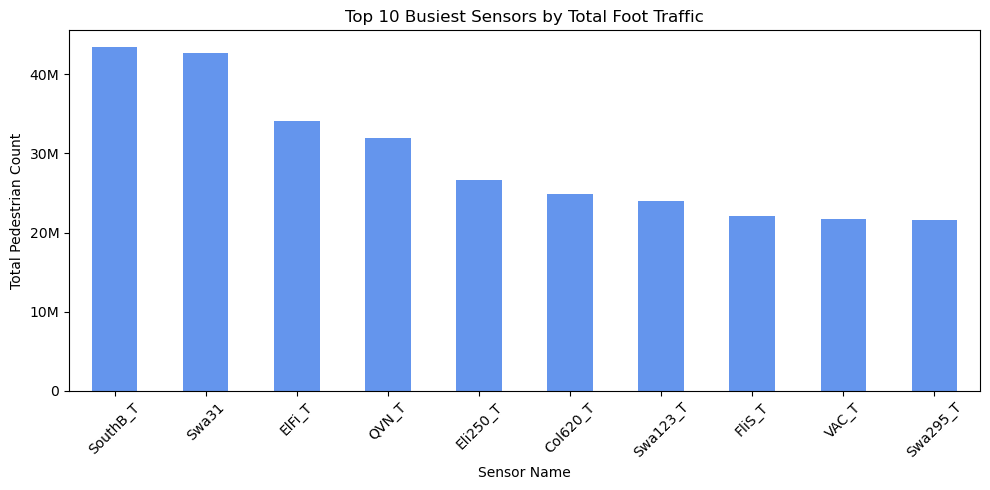

In [66]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
def human_format(x, pos):
    if x >= 1e6:
        return f'{x*1.0/1e6:.0f}M'
    elif x >= 1e3:
        return f'{x*1.0/1e3:.0f}K'
    else:
        return f'{int(x)}'
# Top 10 sensors
top_sensors = df.groupby('Sensor_Name')['Total_of_Directions'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
top_sensors.plot(kind='bar', color='cornflowerblue')
plt.title('Top 10 Busiest Sensors by Total Foot Traffic')
plt.xlabel('Sensor Name')
plt.ylabel('Total Pedestrian Count')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(human_format))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

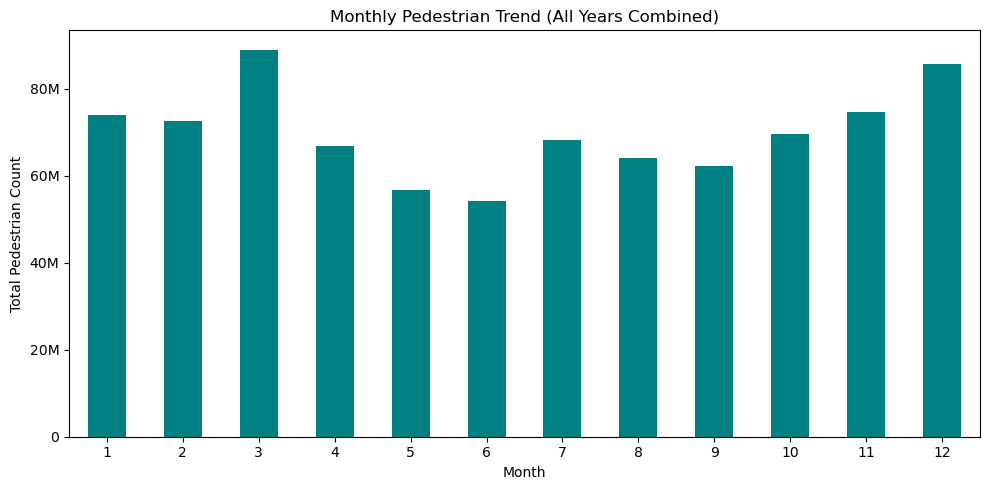

In [68]:
# Group by Month and aggregate total pedestrian count
monthly_trend = df.groupby('Month')['Total_of_Directions'].sum()

plt.figure(figsize=(10, 5))
monthly_trend.plot(kind='bar', color='teal')
plt.title('Monthly Pedestrian Trend (All Years Combined)')
plt.xlabel('Month')
plt.ylabel('Total Pedestrian Count')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(human_format))
plt.tight_layout()
plt.show()


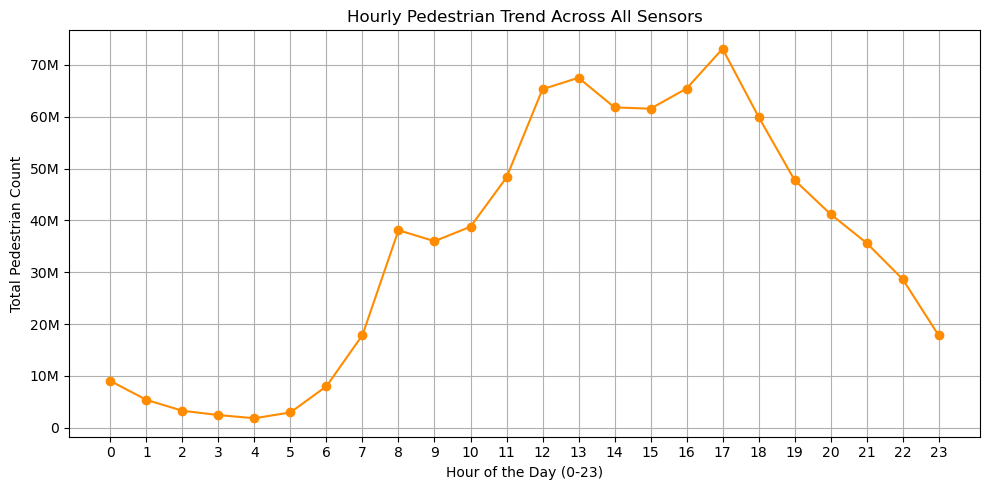

In [70]:
# Group by Hour of the Day and sum the total pedestrian counts
hourly_trend = df.groupby('HourDay')['Total_of_Directions'].sum()

# Plot the hourly trend
plt.figure(figsize=(10, 5))
hourly_trend.plot(kind='line', marker='o', color='darkorange')
plt.title('Hourly Pedestrian Trend Across All Sensors')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Total Pedestrian Count')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(human_format))
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_31724\831169693.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_trend = df.groupby('Weekday')['Total_of_Directions'].sum().reindex(weekday_order)


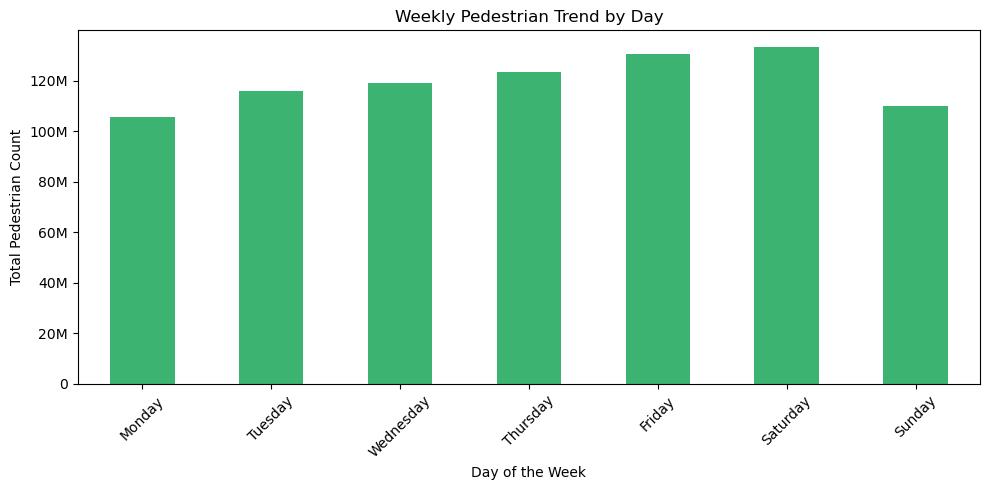

In [72]:
# Ensure weekday order (Monday to Sunday)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by Weekday and sum total pedestrian counts
weekday_trend = df.groupby('Weekday')['Total_of_Directions'].sum().reindex(weekday_order)

# Plot the weekday trend
plt.figure(figsize=(10, 5))
weekday_trend.plot(kind='bar', color='mediumseagreen')
plt.title('Weekly Pedestrian Trend by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Total Pedestrian Count')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(human_format))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


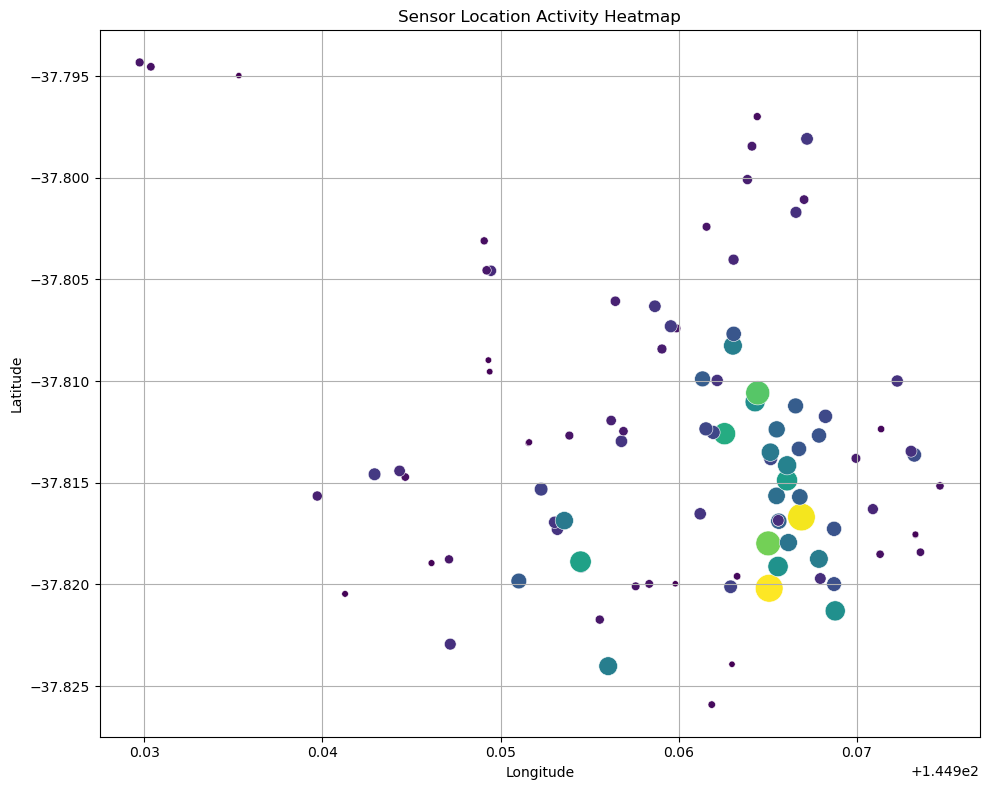

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate total pedestrian count per location
location_activity = df.groupby(['Latitude', 'Longitude'])['Total_of_Directions'].sum().reset_index()

# Plot heatmap using scatter with size based on pedestrian count
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=location_activity,
    x='Longitude',
    y='Latitude',
    size='Total_of_Directions',
    hue='Total_of_Directions',
    palette='viridis',
    legend=False,
    sizes=(20, 400)
)
plt.title('Sensor Location Activity Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

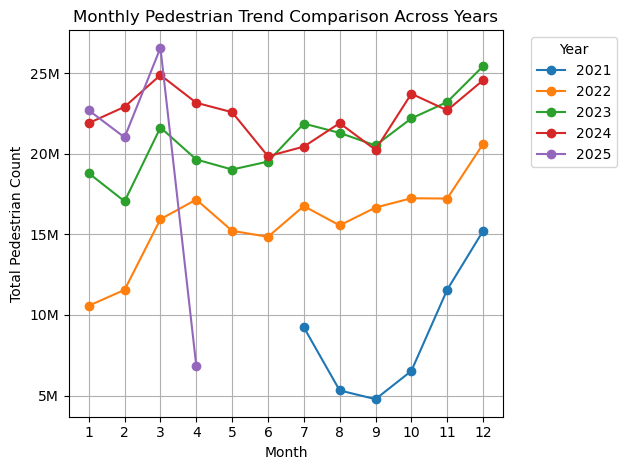

In [74]:
# Group by Year and Month, sum pedestrian counts
monthly_yearly_trend = df.groupby(['Year', 'Month'])['Total_of_Directions'].sum().reset_index()

# Pivot for plotting: rows = Month, columns = Year
pivot_trend = monthly_yearly_trend.pivot(index='Month', columns='Year', values='Total_of_Directions')

# Plot grouped line chart
plt.figure(figsize=(12, 6))
pivot_trend.plot(marker='o')
plt.title('Monthly Pedestrian Trend Comparison Across Years')
plt.xlabel('Month')
plt.ylabel('Total Pedestrian Count')
plt.xticks(range(1, 13))
plt.grid(True)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(human_format))
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [54]:
import folium
import numpy as np

# Re-aggregate total pedestrian count per sensor
sensor_agg = df.groupby(['Sensor_Name', 'Latitude', 'Longitude'])['Total_of_Directions'].sum().reset_index()

# Avoid log(0) errors
sensor_agg['Total_of_Directions'] = sensor_agg['Total_of_Directions'].replace(0, 1)

# Create folium map centered at Melbourne
melbourne_coords = [-37.8136, 144.9631]
sensor_map = folium.Map(location=melbourne_coords, zoom_start=14)

# Add markers with log-scaled radius
for _, row in sensor_agg.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=4 + np.log10(row['Total_of_Directions']),  # Log scale to manage large range
        popup=f"{row['Sensor_Name']}: {int(row['Total_of_Directions'])} people",
        color='red',
        fill=True,
        fill_opacity=0.6
    ).add_to(sensor_map)

sensor_map


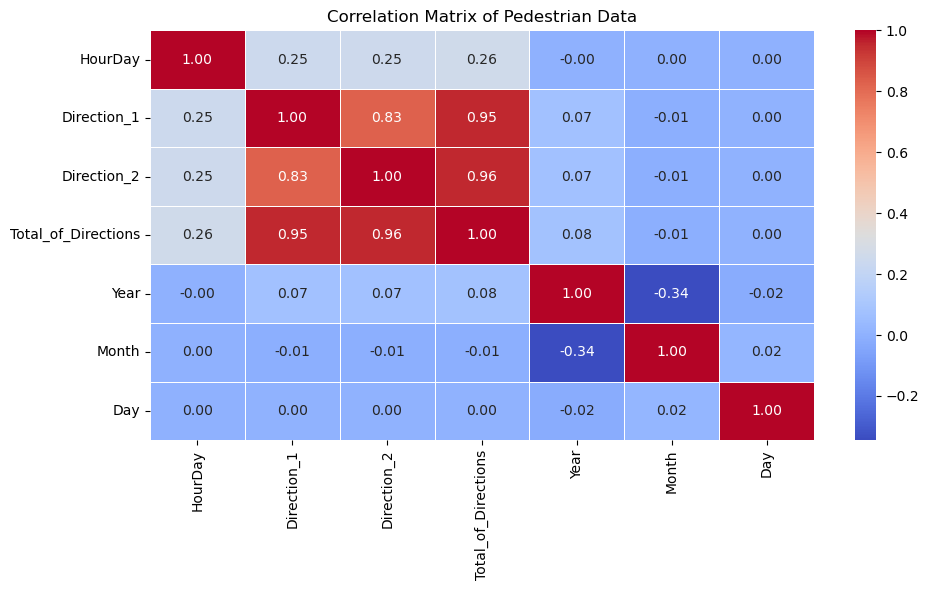

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric features for correlation
numeric_cols = ['HourDay', 'Direction_1', 'Direction_2', 'Total_of_Directions', 'Year', 'Month', 'Day']

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Pedestrian Data")
plt.tight_layout()
plt.show()


In [45]:
# Create a daily time series by summing total pedestrian count per date
daily_ts = df.groupby('Sensing_Date')['Total_of_Directions'].sum().reset_index()

# Rename for clarity
daily_ts.columns = ['Date', 'Daily_Total']

# Set date as index
daily_ts.set_index('Date', inplace=True)

# Display time series head
daily_ts.head()


,Daily_Total
Date,
2021-07-01,469131
2021-07-02,469151
2021-07-03,502246
2021-07-04,390044
2021-07-05,409313


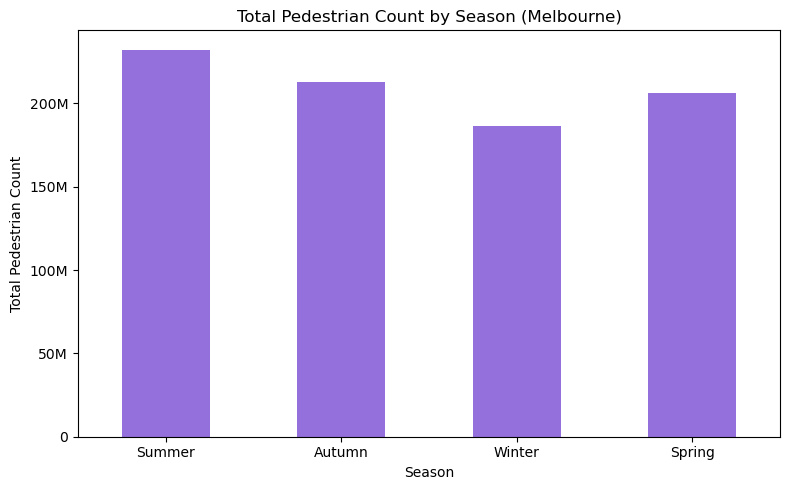

In [76]:
# Define seasons based on Melbourne (Southern Hemisphere)
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    else:
        return 'Spring'

# Apply season mapping
df['Season'] = df['Month'].apply(assign_season)

# Group by season and average daily pedestrian count
seasonal_trend = df.groupby('Season')['Total_of_Directions'].sum().reindex(['Summer', 'Autumn', 'Winter', 'Spring'])

# Plot seasonal trend
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
seasonal_trend.plot(kind='bar', color='mediumpurple')
plt.title('Total Pedestrian Count by Season (Melbourne)')
plt.xlabel('Season')
plt.ylabel('Total Pedestrian Count')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(human_format))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


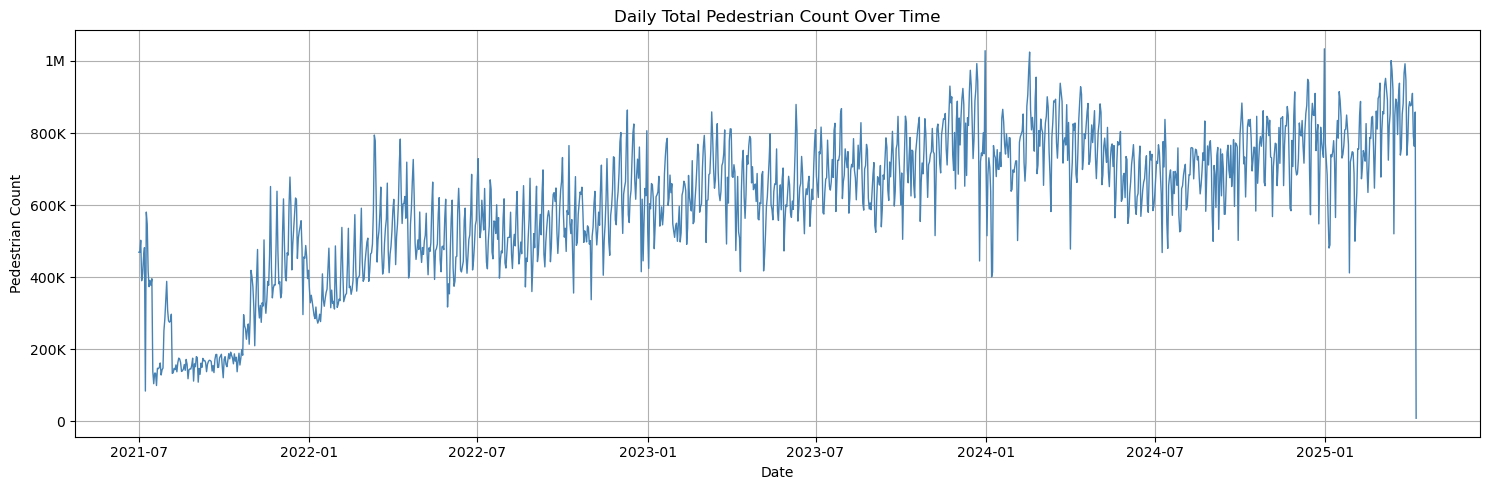

In [78]:
import matplotlib.pyplot as plt

# Reindex to ensure all dates are present (even with 0 count)
all_days = pd.date_range(start=daily_ts.index.min(), end=daily_ts.index.max(), freq='D')
daily_ts = daily_ts.reindex(all_days, fill_value=0)
daily_ts.index.name = 'Date'

# Plot the time series
plt.figure(figsize=(15, 5))
plt.plot(daily_ts.index, daily_ts['Daily_Total'], color='steelblue', linewidth=1)
plt.title('Daily Total Pedestrian Count Over Time')
plt.xlabel('Date')
plt.ylabel('Pedestrian Count')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(human_format))
plt.grid(True)
plt.tight_layout()
plt.show()


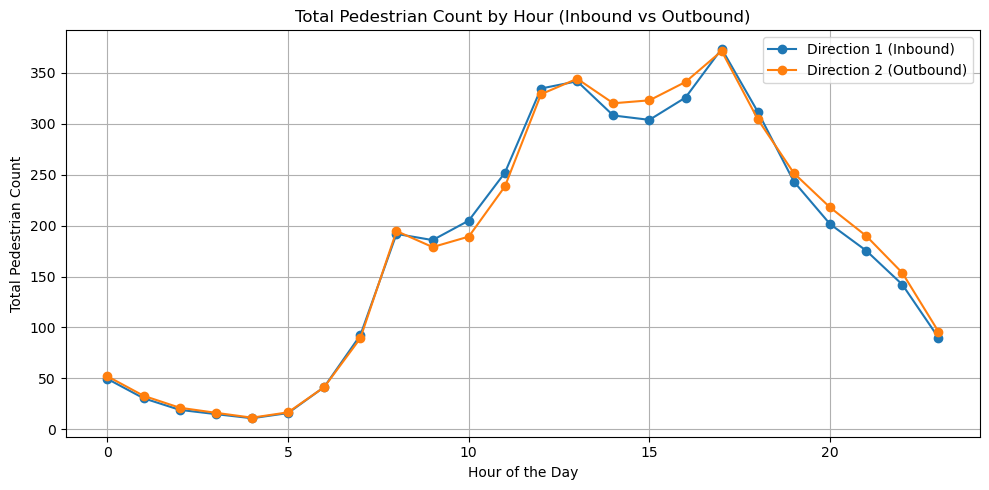

In [94]:
# Use sum instead of mean to get actual volume
hourly_commute = df.groupby('HourDay')[['Direction_1', 'Direction_2']].mean()

# Plot total flows
plt.figure(figsize=(10, 5))
plt.plot(hourly_commute.index, hourly_commute['Direction_1'], label='Direction 1 (Inbound)', marker='o')
plt.plot(hourly_commute.index, hourly_commute['Direction_2'], label='Direction 2 (Outbound)', marker='o')
plt.title('Total Pedestrian Count by Hour (Inbound vs Outbound)')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Pedestrian Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


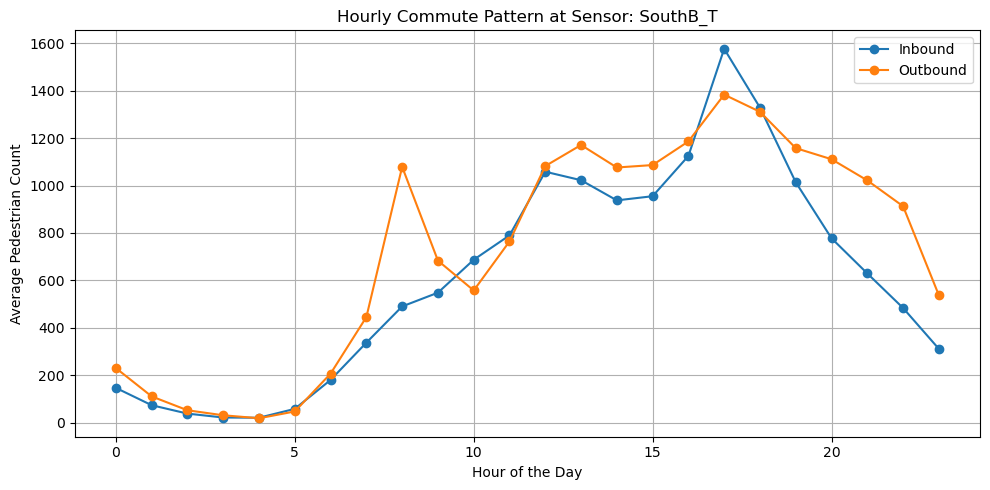

In [90]:
# Get top sensor by total traffic
top_sensor = df.groupby('Sensor_Name')['Total_of_Directions'].sum().idxmax()
sensor_df = df[df['Sensor_Name'] == top_sensor]

# Group by hour for that sensor
sensor_hourly = sensor_df.groupby('HourDay')[['Direction_1', 'Direction_2']].mean()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(sensor_hourly.index, sensor_hourly['Direction_1'], label='Inbound', marker='o')
plt.plot(sensor_hourly.index, sensor_hourly['Direction_2'], label='Outbound', marker='o')
plt.title(f'Hourly Commute Pattern at Sensor: {top_sensor}')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Pedestrian Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_31724\3696593324.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(['Weekday', 'HourDay'])['Total_of_Directions'].mean().unstack()


<Axes: xlabel='HourDay', ylabel='Weekday'>

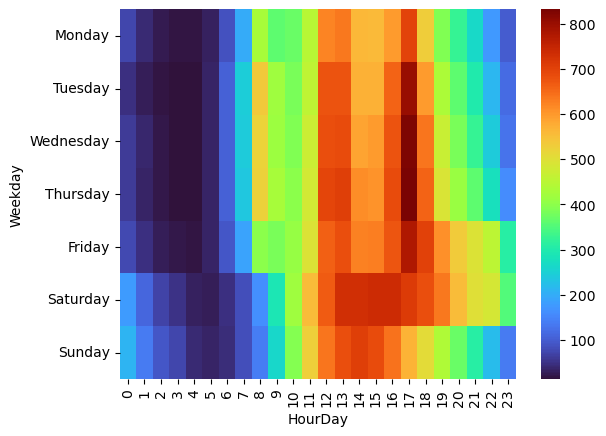

In [128]:
heatmap_data = df.groupby(['Weekday', 'HourDay'])['Total_of_Directions'].mean().unstack()
sns.heatmap(heatmap_data, cmap="turbo")


In [106]:
# If not already installed, run this once:
!pip install holidays

import holidays
import pandas as pd

# Define Australian holidays (VIC state holidays if needed)
aus_holidays = holidays.Australia(years=df['Year'].unique(), prov="VIC")

# Create a holiday flag
df['Is_Public_Holiday'] = df['Sensing_Date'].isin(aus_holidays)

# Check the distribution
print(df['Is_Public_Holiday'].value_counts())


   ---------------------------------------- 0.0/917.9 kB ? eta -:--:--
   - ------------------------------------- 30.7/917.9 kB 660.6 kB/s eta 0:00:02
   ---- ----------------------------------- 92.2/917.9 kB 1.1 MB/s eta 0:00:01
   ------ --------------------------------- 153.6/917.9 kB 1.1 MB/s eta 0:00:01
   --------- ------------------------------ 225.3/917.9 kB 1.3 MB/s eta 0:00:01
   --------------- ------------------------ 358.4/917.9 kB 1.6 MB/s eta 0:00:01
   ------------------------- -------------- 583.7/917.9 kB 2.2 MB/s eta 0:00:01
   ------------------------------- -------- 716.8/917.9 kB 2.2 MB/s eta 0:00:01
   --------------------------------- ------ 768.0/917.9 kB 2.1 MB/s eta 0:00:01
   ----------------------------------- ---- 809.0/917.9 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------  911.4/917.9 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 917.9/917.9 kB 1.9 MB/s eta 0:00:00
Is_Public_Holiday
False    2190444
True       8512

C:\Users\USER\AppData\Local\Temp\ipykernel_31724\2618428962.py:11: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df['Is_Public_Holiday'] = df['Sensing_Date'].isin(aus_holidays)


In [108]:
aus_holidays = holidays.Australia(years=df['Year'].unique(), prov="VIC")

# Create a holiday flag
df['Is_Public_Holiday'] = df['Sensing_Date'].isin(aus_holidays)

# Check the distribution
print(df['Is_Public_Holiday'].value_counts())

Is_Public_Holiday
False    2190444
True       85121
Name: count, dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_31724\2662092272.py:4: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df['Is_Public_Holiday'] = df['Sensing_Date'].isin(aus_holidays)


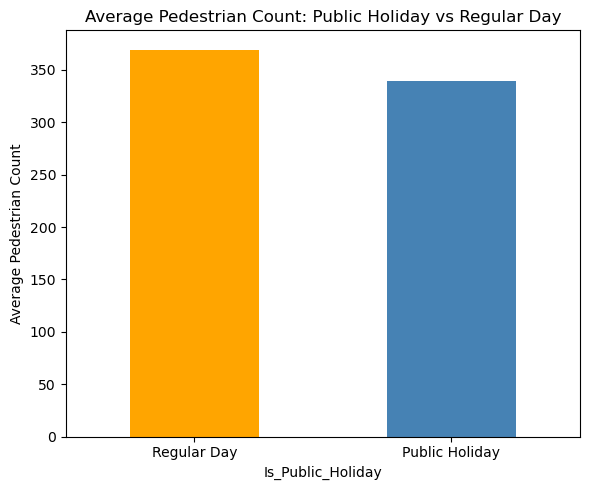

In [121]:
# Group by holiday status
holiday_comparison = df.groupby('Is_Public_Holiday')['Total_of_Directions'].mean()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
holiday_comparison.plot(kind='bar', color=['orange', 'steelblue'], rot=0)
plt.title('Average Pedestrian Count: Public Holiday vs Regular Day')
plt.xticks([0, 1], ['Regular Day', 'Public Holiday'], rotation=0)
plt.ylabel('Average Pedestrian Count')
plt.tight_layout()
plt.show()


In [140]:
daily_ts = df.groupby('Sensing_Date')['Total_of_Directions'].sum().reset_index()
daily_ts.columns = ['Date', 'Daily_Total']
daily_ts = daily_ts.set_index('Date').asfreq('D').fillna(0)  # Ensure daily freq
daily_ts

,Daily_Total
Date,
2021-07-01,469131
2021-07-02,469151
2021-07-03,502246
2021-07-04,390044
2021-07-05,409313
...,...
2025-04-05,910116
2025-04-06,790988
2025-04-07,763330


In [138]:
output_path = r"C:\Users\USER\Chameleon AI-IoT\MOP-Code\artificial-intelligence\Traffic Analysis\LSTM-GRU Vehicle Traffic\datasets/daily_pedestrian_data.csv"
daily_ts.to_csv(output_path)